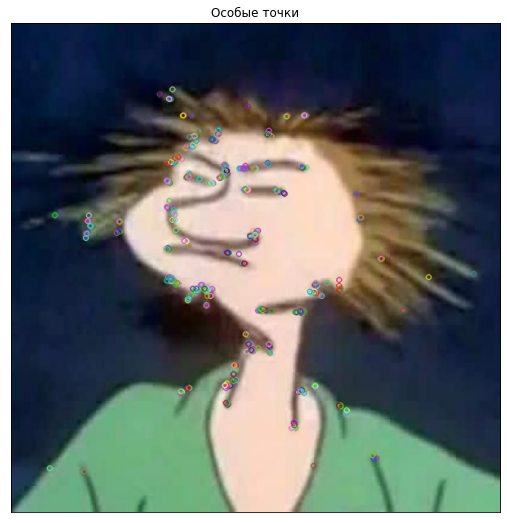

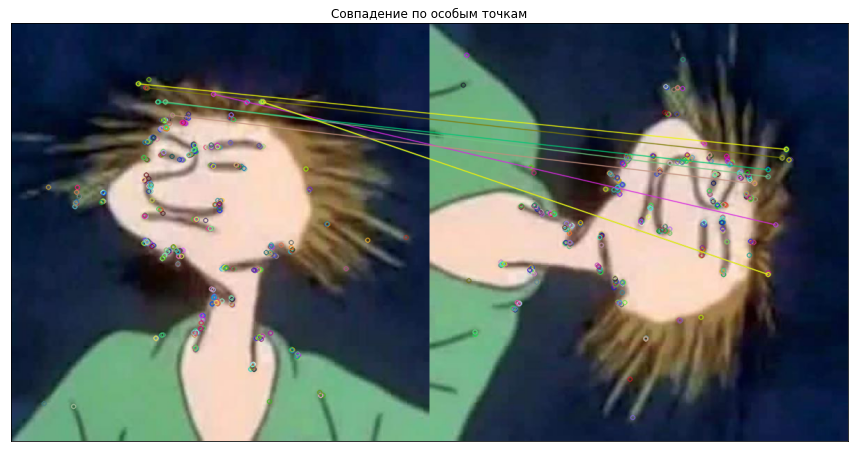

In [8]:
#Импорт библиотек
import numpy as np 
import cv2 
import urllib
import urllib.request
from matplotlib import pyplot as plt      

# Локальный импорт. Неудобный вариант
# Чтение оригинального и измененного изображений
# original_img_1 = cv2.imread('shaggy1.jpg') 
# turned_img_1 = cv2.imread('shaggy2.jpg') 

#Импорт картинок из интернета по ссылкам. Универсальный вариант
#Загрузка 1-ой картинки из интернета
imgloc = "https://i.ibb.co/dPfM3HG/shaggy1.jpg"              #Производим ссылку на 1-ое изображение в виде URL
imgloc_response = urllib.request.urlopen(imgloc)                                   #извлекаем содержание URL
imgloc_array = np.array(bytearray(imgloc_response.read()), dtype=np.uint8)         #Преобразуем полученную информацию из URL в массив NumPy
original_img_1 = cv2.imdecode(imgloc_array, -1)                                               #Декодируем полученный массив

#Загрузка 2-ой картинки из интернета
imgloc_1 = "https://i.ibb.co/8x3tzh0/shaggy2.jpg"            #Производим ссылку на 2-ое изображение в виде URL
imgloc_response_1 = urllib.request.urlopen(imgloc_1)                               #извлекаем содержание URL
imgloc_array_1 = np.array(bytearray(imgloc_response_1.read()), dtype=np.uint8)     #Преобразуем полученную информацию из URL в массив NumPy
turned_img_1 = cv2.imdecode(imgloc_array_1, -1) #Декодируем полученный массив
   
#Конвертируем в RGB и преобразуем в ЧБ
original_img = cv2.cvtColor(original_img_1,cv2.COLOR_BGR2RGB)
turned_img = cv2.cvtColor(turned_img_1,cv2.COLOR_BGR2RGB)
original_img_bw = cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY) 
turned_img_bw = cv2.cvtColor(turned_img, cv2.COLOR_BGR2GRAY) 
   
#Создаем оператор ORB
orb = cv2.ORB_create() 
   
# Находим особые точки и вычисляыем дескрипторы для изображений
originalKeypoints, originalDescriptors = orb.detectAndCompute(original_img_bw, None) 
turnedKeypoints, turnedDescriptors = orb.detectAndCompute(turned_img_bw,None) 
  
#Сопоставляем дескрипторы двух изображений
matcher = cv2.BFMatcher() 
matches = matcher.match(originalDescriptors,turnedDescriptors) 

#Рисуем особые точки и совпадения
keypoints_img = cv2.drawKeypoints(original_img, originalKeypoints, None) 
matches_img = cv2.drawMatches(original_img, originalKeypoints,  turned_img, turnedKeypoints, matches[:8],None) 
 
#Строим изображения через matplotlib  
plt.figure(figsize=(9, 9)), plt.imshow(keypoints_img), plt.title('Особые точки')
plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15, 15)),plt.imshow(matches_img), plt.title('Совпадение по особым точкам')
plt.xticks([]), plt.yticks([])    
plt.show()